In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [ ]:
wine = pd.read_csv('wine.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [ ]:
print(wine['quality'].unique()) 

['bad' 'good']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

wine.iloc[:,11] = labelencoder.fit_transform(wine.iloc[:,11].values)

In [ ]:
print(wine['quality'].unique())

[0 1]


In [ ]:
X = wine.iloc[:,0:11].values
Y = wine.iloc[:,11].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#KNN and Naive Bayes 

def models(X_train, Y_train):

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0 )
  forest.fit(X_train, Y_train)

  print('[1]KNN Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]Naive Bayes Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[3]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

  return knn, gauss, forest

In [ ]:
model = models(X_train, Y_train)

[1]KNN Training Accuracy:  0.8162627052384676
[2]Naive Bayes Training Accuracy:  0.7224394057857702
[3]Random Forest Training Accuracy:  0.9874902267396404


In [ ]:
#Show confusion matrix and accuracy for KNN and Naive Bayes

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #Extract TN, TP, FN, FP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TP + TN + FN + FP)
  recall = (TP) / (TP + FN)
  precision = (TP) / (TP + FP)
  print(cm)
  print('Model[{}] \n Testing Accuracy = "{}" \n Recall = "{}" \n Precision = "{}"'.format(i, test_score, recall, precision))
  print()

[[ 98  50]
 [ 42 130]]
Model[0] 
 Testing Accuracy = "0.7125" 
 Recall = "0.7558139534883721" 
 Precision = "0.7222222222222222"

[[108  40]
 [ 50 122]]
Model[1] 
 Testing Accuracy = "0.71875" 
 Recall = "0.7093023255813954" 
 Precision = "0.7530864197530864"

[[124  24]
 [ 44 128]]
Model[2] 
 Testing Accuracy = "0.7875" 
 Recall = "0.7441860465116279" 
 Precision = "0.8421052631578947"



In [ ]:
#Get feature importance 
forest = model[2]
importances = pd.DataFrame({'feature': wine.iloc[:,0:11].columns, 'importance': np.round(forest.feature_importances_,3) })
importances = importances.sort_values('importance', ascending = False).set_index('feature')                                
importances 

,importance
feature,
alcohol,0.158
sulphates,0.134
total sulfur dioxide,0.111
volatile acidity,0.106
density,0.104
fixed acidity,0.072
chlorides,0.065
pH,0.065
residual sugar,0.063


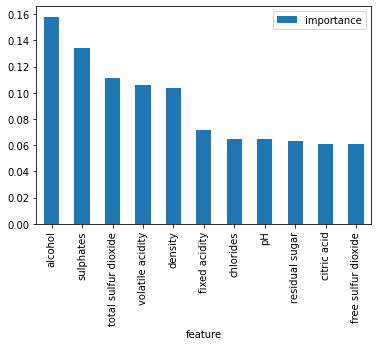

In [ ]:
importances.plot.bar()

In [ ]:
#print the prediction of the KNN classifier 
KNNpred = model[0].predict(X_test)

print("-------------KNN---------------\n")
print("Predicted Values where 0 is bad and 1 is Good")
print(KNNpred)

print()

print("Actual Values where 0 is bad and 1 is Good")
#print actual values
print(Y_test)

print() 
print()

NB_pred = model[1].predict(X_test)

print("-------------Naive Bayes---------------\n")
print("Predicted Values where 0 is bad and 1 is Good\n")
print(NB_pred)

print()

#print actual values
print("Actual Values where 0 is bad and 1 is Good\n")
print(Y_test)

Rf_pred = model[2].predict(X_test)

print("-------------Random Forest---------------\n")
print("Predicted Values where 0 is bad and 1 is Good\n")
print(Rf_pred)

print()

#print actual values
print("Actual Values where 0 is bad and 1 is Good\n")
print(Y_test)

-------------KNN---------------

Predicted Values where 0 is bad and 1 is Good
[0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1]

Actual Values where 0 is bad and 1 is Good
[1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1
 0

In [ ]:
# order: fixed acidity,volatile acidity,citric acid,residual sugar, chlorides,
#free sulfur dioxide, total sulfur dioxide, density, pH,sulphates,alcohol             

quality_params = [[6.4,0.9,0.8,15,0.254,58,183,0.9939,3.81,2,9.5]] #order above

#print prediction of my survival using Random Forest 
qualityPrediction = model[2].predict(quality_params)
print(qualityPrediction)

if qualityPrediction == 0:
  print("Bad")
else:
  print('Good')

[1]
Good


In [ ]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Import Kmeans 

from sklearn.cluster import KMeans

In [ ]:
X = np.array(wine.drop(['quality'], 1).astype(float))
y = np.array(wine['quality'])

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.3877423389618512


In [ ]:
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


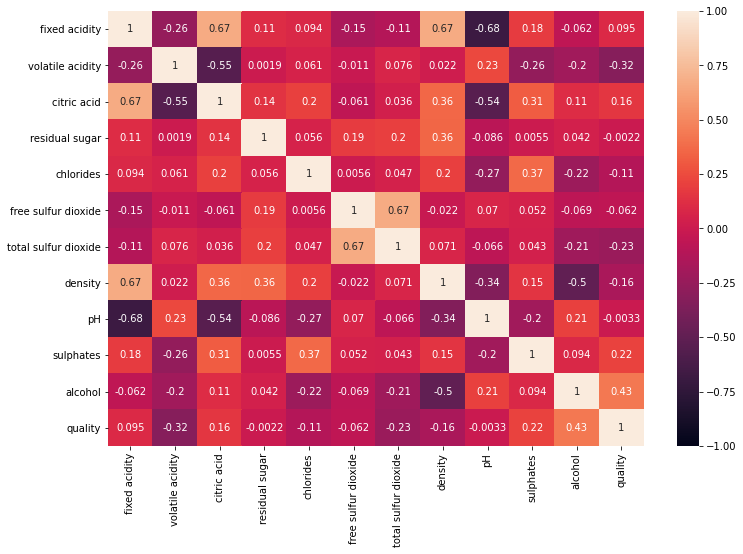

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(wine.corr(),annot = True, vmin=-1, vmax=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

dummyDB = wine.copy()
#Encode the quality col i.e change from object to int
dummyDB.iloc[:,11] = labelencoder.fit_transform( dummyDB.iloc[:,11].values) #11 bec quality is at index 11

In [ ]:
dummyDB.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


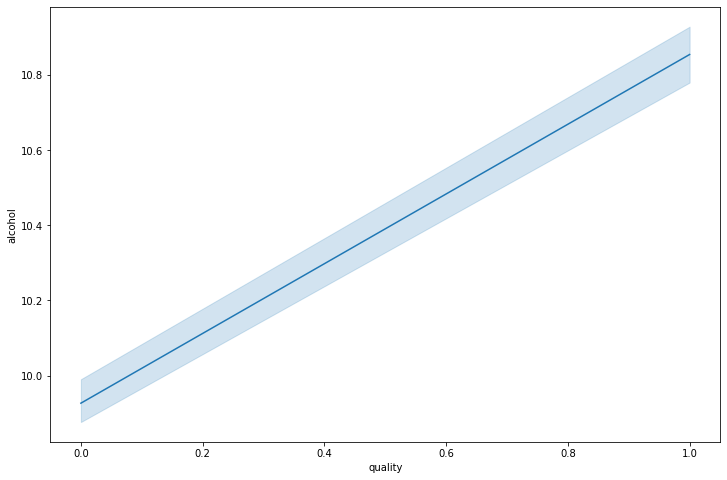

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['alcohol'])

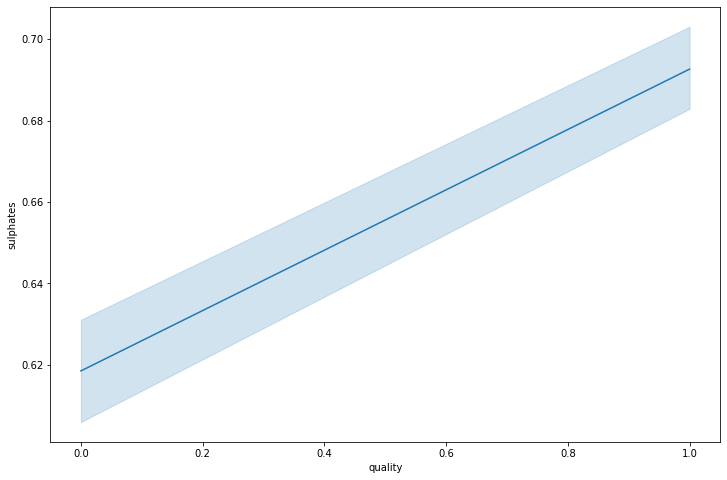

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['sulphates'])

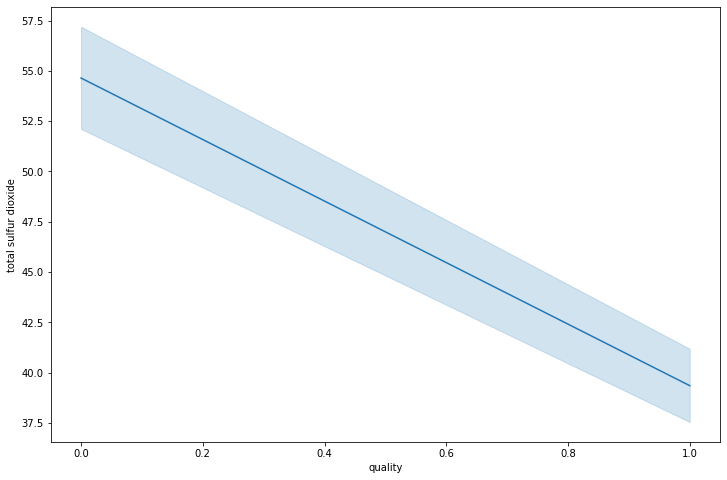

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['total sulfur dioxide'])

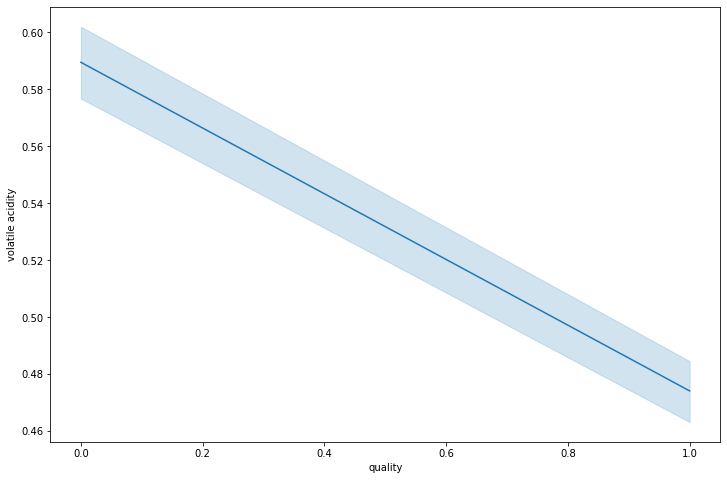

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['volatile acidity'])

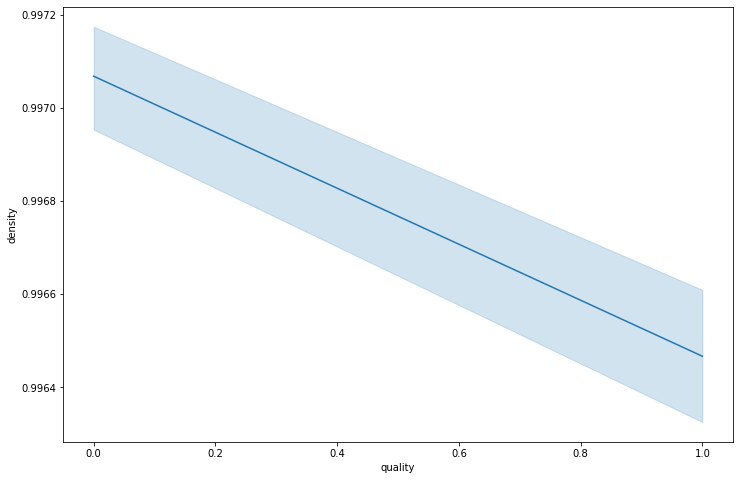

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['density'])

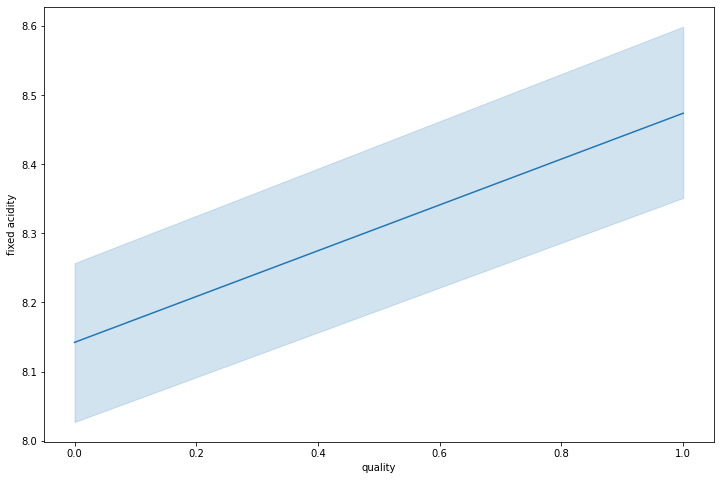

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['fixed acidity'])

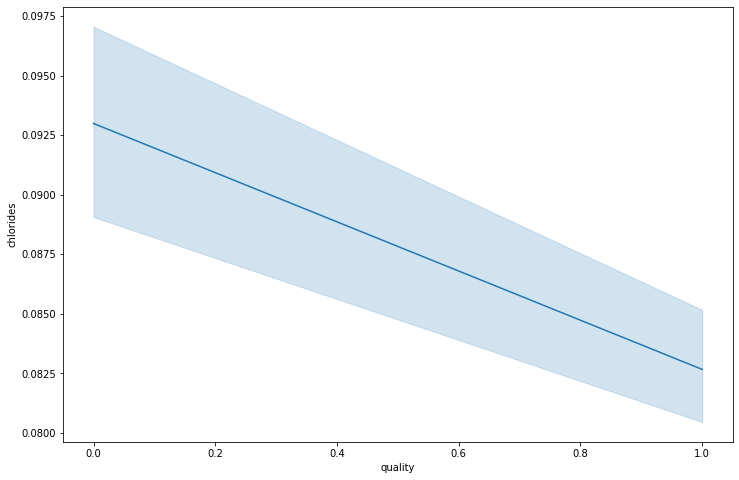

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['chlorides'])

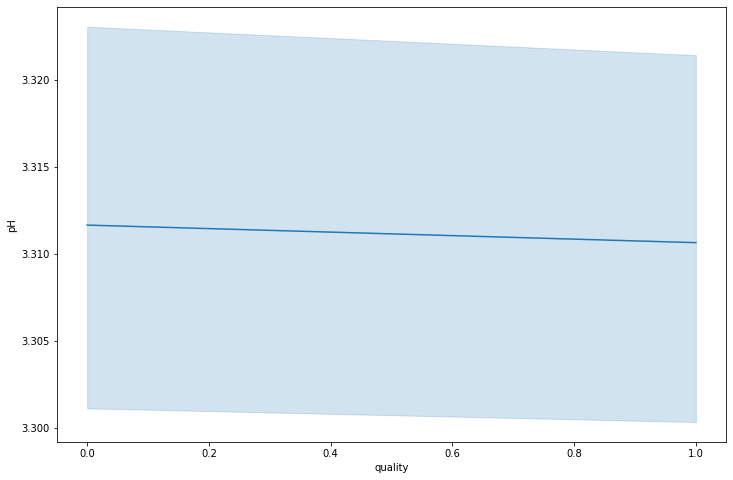

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['pH'])

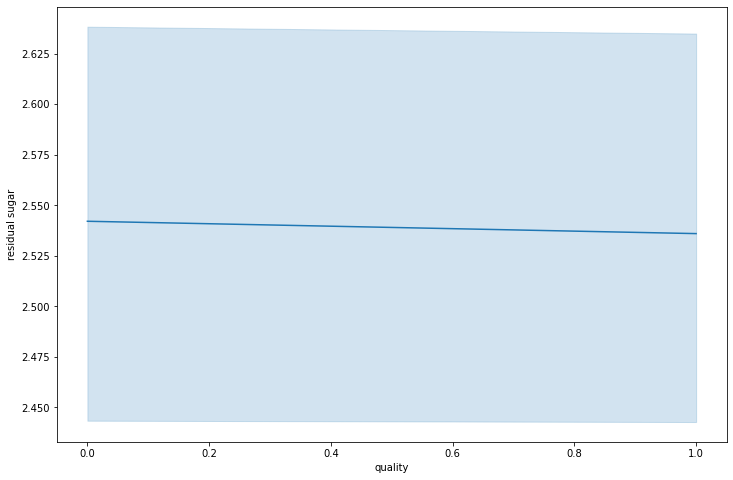

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['residual sugar'])

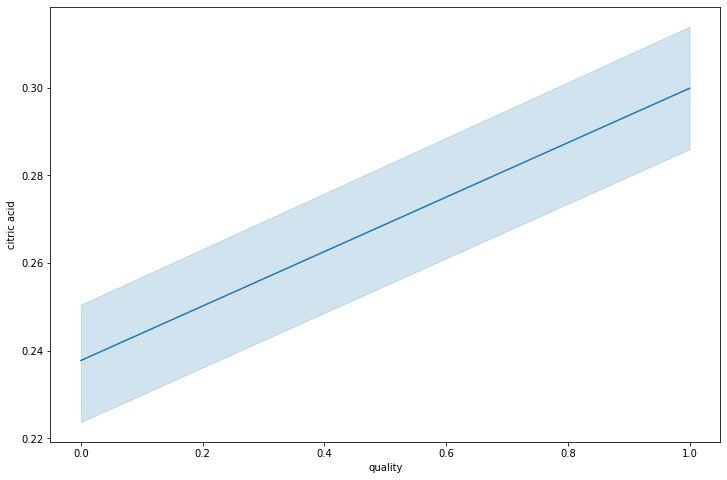

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dummyDB['quality'], y=dummyDB['citric acid'])

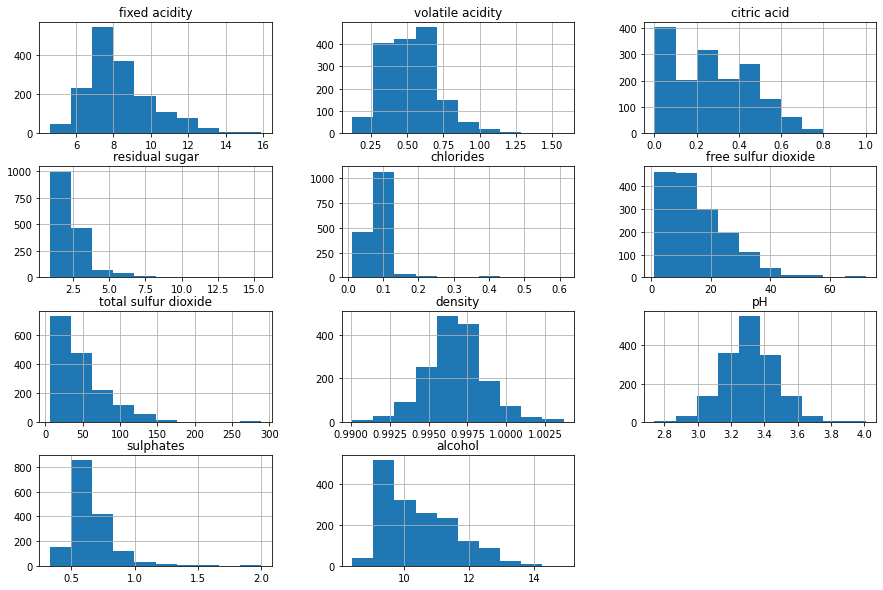

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
col = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
dummyDB.hist(column=col , bins=10, figsize=(15,10))
plt.show()